# **Module 3 of 3: Inference & Prediction** - *Use your trained “potholes” vs. “road_without_potholes” model to make predictions on new images and interpret both positive and negative probabilities.*

---

# **Introduction** <br>
In this final module, you’ll take the trained “road_potholes” vs. “road_without_potholes” classifier from Module 2 and build a simple Colab‐based inference pipeline. By the end, you will be able to:

* Load your saved model: Fetch the .h5 file you exported in Module 2 and restore it for prediction.

* Preprocess & Predict: Write a helper that reads a new image, applies the same resizing and normalization used in training, and outputs the model’s confidence score.

* Separate Positive vs. Negative Interfaces: Provide two standalone cells that one to report the probability that an image contains a pothole (positive class) and one for the probability that it does not (negative class).

* Visualize & Interpret: Display the input image alongside its predicted score, helping you gauge model confidence on real‐world examples.

By completing this module, you’ll have a full end-to-end workflow—from scraping raw data in Module 1 to live model inference in Module 3—ready for experimentation or light deployment.

<br>


# 3. Inference & Prediction

###3.0 Setup & Imports (please run the following code cells)

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
!pip install numpy pandas matplotlib
!pip install scikit-learn
!pip install tensorflow
!pip install tensorflow-addons

In [17]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras.applications.mobilenet_v2 as mobilenet_v2
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image

### 3.1 Load the Trained Model

We can upload an image and use the trained model to predict whether it contains a zebra crossing. In our Colab notebook, we provide a function that:

- Loads and preprocesses the user-uploaded image.

- Feeds the image into the trained model.

- Displays the predicted confidence (as a percentage) that the image contains a zebra crossing.



In [18]:
# TODO: Load the trained model
# Adjust the path to wherever you saved your Module 2 model
model = tf.keras.models.load_model("drive/MyDrive/ra/trained_models/potholes_classifier.h5")

 ### 3.2 Predict a single image’s positive-class confidence:
 Run Cell A and upload an image from your local file for positive prediction

Saving potholes1.jpg to potholes1 (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


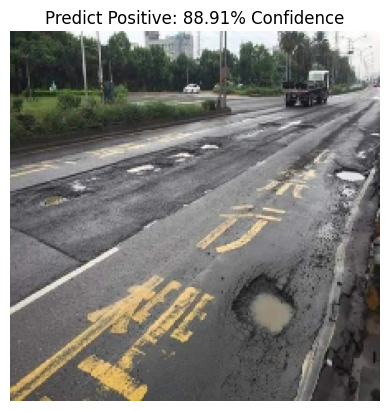

Positive-class probability (Target present): 88.91%


In [27]:
# Cell A
# To test, allow student to upload an image:
from google.colab import files

def predict_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    probability = model.predict(img_array)[0][0]
    confidence = probability * 100
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predict Positive: {confidence:.2f}% Confidence")
    plt.show()
    print(f"Positive-class probability (Target present): {confidence:.2f}%")

uploaded = files.upload()
if uploaded:
    test_img_path = list(uploaded.keys())[0]
    predict_image(test_img_path)

 ### 3.3 Predict a single image’s negative-class confidence:

 Run Cell B and upload an image from your local file for negative prediction

Saving potholes1.jpg to potholes1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


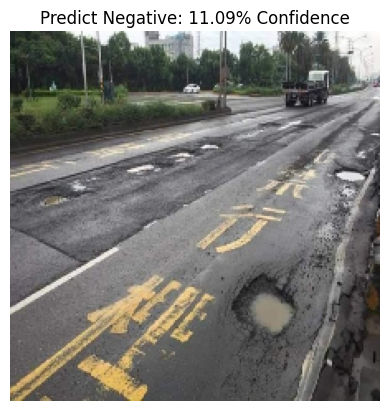

Negative-class probability (Target NOT present): 11.09%


In [25]:
# Cell B
def predict_negative(image_path):
    # load & preprocess
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # predict positive probability
    pos_prob = model.predict(img_array)[0][0]
    neg_conf = (1.0 - pos_prob) * 100

    # display
    plt.imshow(img); plt.axis("off")
    plt.title(f"Predict Negative: {neg_conf:.2f}% Confidence")
    plt.show()
    print(f"Negative-class probability (Target NOT present): {neg_conf:.2f}%")

uploaded = files.upload()
if uploaded:
    img = next(iter(uploaded))
    predict_negative(img)

### Summary of All Three Modules
* Module 1: Data Collection & Preprocessing

  - Scraped “road_potholes” vs. “road_without_potholes” images via DuckDuckGo API

  - Organized into labeled folders, cleaned and resized them

  - Wrapped path/label logic into a reusable create_dataset() function

* Module 2: Model Training & Validation

  - Built a MobileNetV2-based classifier with a small custom head

  - Used stratified k-fold cross-validation for balanced, reliable performance estimates

  - Trained across folds and visualized accuracy/loss trends

* Module 3: Inference & Prediction

  - Loaded the saved model to predict on new images

  - Cell A: Reports the positive-class (pothole) probability

  - Cell B: Reports the negative-class (clean road) probability

You can now upload any road image and immediately see both sides of the model’s confidence—completing a smooth end-to-end ML pipeline.